In [278]:
TEST_MATRIX_SIZE = 5
ITERATIONS = 20
import numpy as np


# Generate a small test set
Test_Adjacency_Matrix = np.random.randint(10, size=(TEST_MATRIX_SIZE,TEST_MATRIX_SIZE))
Test_Adjacency_Matrix = np.add(Test_Adjacency_Matrix, np.ones(TEST_MATRIX_SIZE, dtype=int))

for i in range(len(Test_Adjacency_Matrix[0])):
    for j in range(i , len(Test_Adjacency_Matrix[1])):
        if (i==j):
            Test_Adjacency_Matrix[i][j] = 0
        else:
            Test_Adjacency_Matrix[i,j] = Test_Adjacency_Matrix[j,i]

print(Test_Adjacency_Matrix)

[[0 2 1 2 2]
 [2 0 6 6 3]
 [1 6 0 6 6]
 [2 6 6 0 3]
 [2 3 6 3 0]]


##### Some settings

In [279]:
initial_schedule = list(range(len(Test_Adjacency_Matrix)))

##### Some methods

In [280]:
def Get_Schedule_Length(given_schedule):
    # Adjust the given_schedule (schedule), for example [A, B, C] -> [A, B, C, A]
    # then compute the travel distance of the given array.
    given_schedule = np.append(given_schedule, given_schedule[0])
    sum = 0
    for j in range(len(given_schedule)-1):
        sum += Test_Adjacency_Matrix[given_schedule[j],given_schedule[j+1]]
    return sum

def Get_Permutation(current_schedule):
    permutation = []
    # for i in range(len(current_schedule)):
    #     for j in range(i+1, len(current_schedule)):
    #         neighbor = current_schedule.copy()
    #         neighbor[i] = current_schedule[j]
    #         neighbor[j] = current_schedule[i]
    #         permutation.append(neighbor)
    # permutation = np.array(permutation)
    permutation = np.random.permutation(current_schedule)
    return permutation

##### 3(a) Hill Climbing

In [281]:
best_schedule = initial_schedule
best_result = np.inf

HC = []

# Start Iterations
for i in range(ITERATIONS):
    for j in range(1000): # try 1000 possible route in each iteration. (much less than 15!)
        current_schedule = np.random.permutation(best_schedule)
        if(Get_Schedule_Length(current_schedule)<best_result):
            best_schedule = current_schedule
            best_result = Get_Schedule_Length(current_schedule)
    HC.append(best_result)
# print(HC)
HC_best_schedule = best_schedule

##### 3(b) Random Walk

In [282]:
best_result = Get_Schedule_Length(initial_schedule)
best_schedule = initial_schedule
RW = []
RW.append(best_result)

for i in range(ITERATIONS):
    # random select an route from the permutation of old schedule
    current_schedule = np.random.permutation(best_schedule)
    if(Get_Schedule_Length(current_schedule)<best_result):
        best_schedule = current_schedule
        best_result = Get_Schedule_Length(current_schedule)
    RW.append(best_result)

RW_best_schedule = best_schedule

##### 3(c) Genetic Algorithm

In [283]:
POPULATION_SIZE = 10
CROSSOVER_PROBABILITY = 0.1
NUMBER_OF_PAIRS_OF_MULTI_BIT_FLIP = 2

def Generate_Population(initial_schedule):
    Population = []
    for i in range(POPULATION_SIZE):
        Single_Creature = Get_Permutation(initial_schedule)
        Population.append(Single_Creature)
    return Population

def Roulete_Wheel_Selection(Given_Matrix):
    A = []
    max = -np.inf
    for i in range(len(Given_Matrix)):
        schedule_length = Get_Schedule_Length(Given_Matrix[i])
        A.append(schedule_length)
        if schedule_length > max:
            max = schedule_length

    sum = 0
    for j in range(len(Given_Matrix)):
        sum += A[j]
        A[j] = sum

    Matepool = []
    for k in range(int(len(Given_Matrix)/2)):
        a = np.random.randint(sum)
        i=0
        while(a>A[i]):
            i += 1
        Matepool.append(Given_Matrix[i])

    return Matepool

def Uniform_Crossover(Given_Matrix):
    Test_Matrix = Given_Matrix
    for i in range(int(len(Test_Matrix)/2)):

        for j in range(int(len(Test_Matrix[i]))):
            a = np.random.uniform(0,1,1)
            if a >= CROSSOVER_PROBABILITY:
                # SWAP the elements among two weapons lists.
                Test_Matrix[2*i][j], Test_Matrix[2*i+1][j] = Test_Matrix[2*i+1][j], Test_Matrix[2*i][j]
    return Test_Matrix

def Multi_Bit_Flip_Mutation(Given_Matrix, Number_of_Pairs_of_Multi_Bit_Flip):
    Test_Matrix = Given_Matrix
    # Doubling the population size in the step\
    # \to make the amount of creatures fixed in each generations.
    Test_Matrix = np.concatenate((Test_Matrix, Test_Matrix))

    #
    for i in range(int(len(Test_Matrix)/2)):
        for j in range(Number_of_Pairs_of_Multi_Bit_Flip):
            interchange_location = np.random.randint(int(len(Test_Matrix[i])),size=2)
            Test_Matrix[i][interchange_location[0]], Test_Matrix[i][interchange_location[1]] =\
            Test_Matrix[i][interchange_location[1]], Test_Matrix[i][interchange_location[0]]

    return Test_Matrix

def Get_the_Best_Combination(Given_Matrix, print_result):
    min = np.inf
    for i in range(len(Given_Matrix)):
        if Get_Schedule_Length(Given_Matrix[i]) < min:
            min = Get_Schedule_Length(Given_Matrix[i])
            best_combination = Given_Matrix[i]
    if (print_result):
        print(f'   The best combination in the current generation is: {best_combination}'
              f'\n    with schedule travel distance: {min}')
    return min, best_combination

initial_schedule = list(range(len(Test_Adjacency_Matrix)))

GA = []
best_result = np.inf
Population = Generate_Population(initial_schedule)
for iters in range(int(ITERATIONS/POPULATION_SIZE)):
    Selected_Creatures = Roulete_Wheel_Selection(Population)
    Syngamy = Uniform_Crossover(Selected_Creatures)
    Next_Generation = Multi_Bit_Flip_Mutation(Syngamy,
                                              NUMBER_OF_PAIRS_OF_MULTI_BIT_FLIP)
    Population = Next_Generation
    current_result, current_schedule = Get_the_Best_Combination(Next_Generation,
                                                                print_result=0)

    if(Get_Schedule_Length(current_schedule)<best_result):
        best_schedule = current_schedule
        best_result = Get_Schedule_Length(current_schedule)
    # Since GA is a population-wise comparison algorithms,
    # append the best result multiple times to compare GA with other algorithms.
    for population_size in range(POPULATION_SIZE):
        GA.append(best_result)

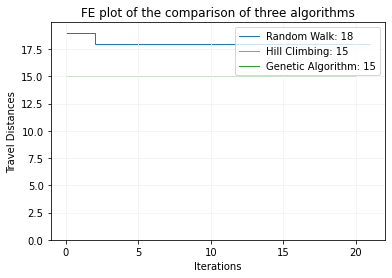

In [284]:
import matplotlib.pyplot as plt
plot1 = plt.stairs(RW, label=f'Random Walk: {RW[-1]}', baseline=None)
plot1 = plt.stairs(HC, label=f'Hill Climbing: {HC[-1]}', baseline=None)
plot1 = plt.stairs(GA, label=f'Genetic Algorithm: {GA[-1]}', baseline=None)
# plot1 = plt.stairs(TS, label='Tabular Search', baseline=None)

plot1 = plt.xlabel('Iterations')
plot1 = plt.ylabel('Travel Distances')
plot1 = plt.title('FE plot of the comparison of three algorithms')
# plt.xlim()

plot1 = plt.grid(axis='both', color='0.95')

plot1 = plt.legend(loc=1)

plot1 = plt.show()

In [285]:
print(HC_best_schedule)

[1 0 2 3 4]
